## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# regular expressions: for matching patterns in strings
import re

# from scikit learn
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# model selection
from sklearn.model_selection import train_test_split

# !pip install xgboost (if not installed use this)
import xgboost as xgb

# !pip install tensorflow

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Sequential
from collections import Counter

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error




## Loading Data

In [3]:
data = pd.read_csv("SolarPrediction.csv")

In [4]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [5]:
data.shape

(32686, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


## Data Wrangling

In [7]:
df=data.copy()

In [8]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [9]:
string = "9/29/2016 12:00:00 AM"
string.split()[0]

'9/29/2016'

In [10]:
df['Data'] = df['Data'].apply(lambda x: x.split()[0])

In [11]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [12]:
# Converting data to date time format, extracting month from tha
df['Month'] = pd.to_datetime(df['Data']).dt.month
df['Day'] = pd.to_datetime(df['Data']).dt.day
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Minute'] = pd.to_datetime(df['Time']).dt.minute
df['Second'] = pd.to_datetime(df['Time']).dt.second

In [13]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24


In [14]:
df['risehour'] = pd.to_datetime(df['TimeSunRise']).dt.hour
df['riseminute']=pd.to_datetime(df['TimeSunRise']).dt.minute

df['sethour'] = pd.to_datetime(df['TimeSunSet']).dt.hour
df['setminute'] = pd.to_datetime(df['TimeSunSet']).dt.minute

In [15]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second,risehour,riseminute,sethour,setminute
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26,6,13,18,13
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23,6,13,18,13
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26,6,13,18,13
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21,6,13,18,13
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24,6,13,18,13


In [16]:
# drop the parameters that are not required after extracting the relevant information
df.drop(['UNIXTime', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis = 1, inplace = True)

In [17]:
df.shape

(32686, 15)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Radiation               32686 non-null  float64
 1   Temperature             32686 non-null  int64  
 2   Pressure                32686 non-null  float64
 3   Humidity                32686 non-null  int64  
 4   WindDirection(Degrees)  32686 non-null  float64
 5   Speed                   32686 non-null  float64
 6   Month                   32686 non-null  int32  
 7   Day                     32686 non-null  int32  
 8   Hour                    32686 non-null  int32  
 9   Minute                  32686 non-null  int32  
 10  Second                  32686 non-null  int32  
 11  risehour                32686 non-null  int32  
 12  riseminute              32686 non-null  int32  
 13  sethour                 32686 non-null  int32  
 14  setminute               32686 non-null

In [19]:
df.isnull().sum()

Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
Month                     0
Day                       0
Hour                      0
Minute                    0
Second                    0
risehour                  0
riseminute                0
sethour                   0
setminute                 0
dtype: int64

## Feature Selection Using Correlation Matrix

In [20]:
corr_matrix = df.corr()

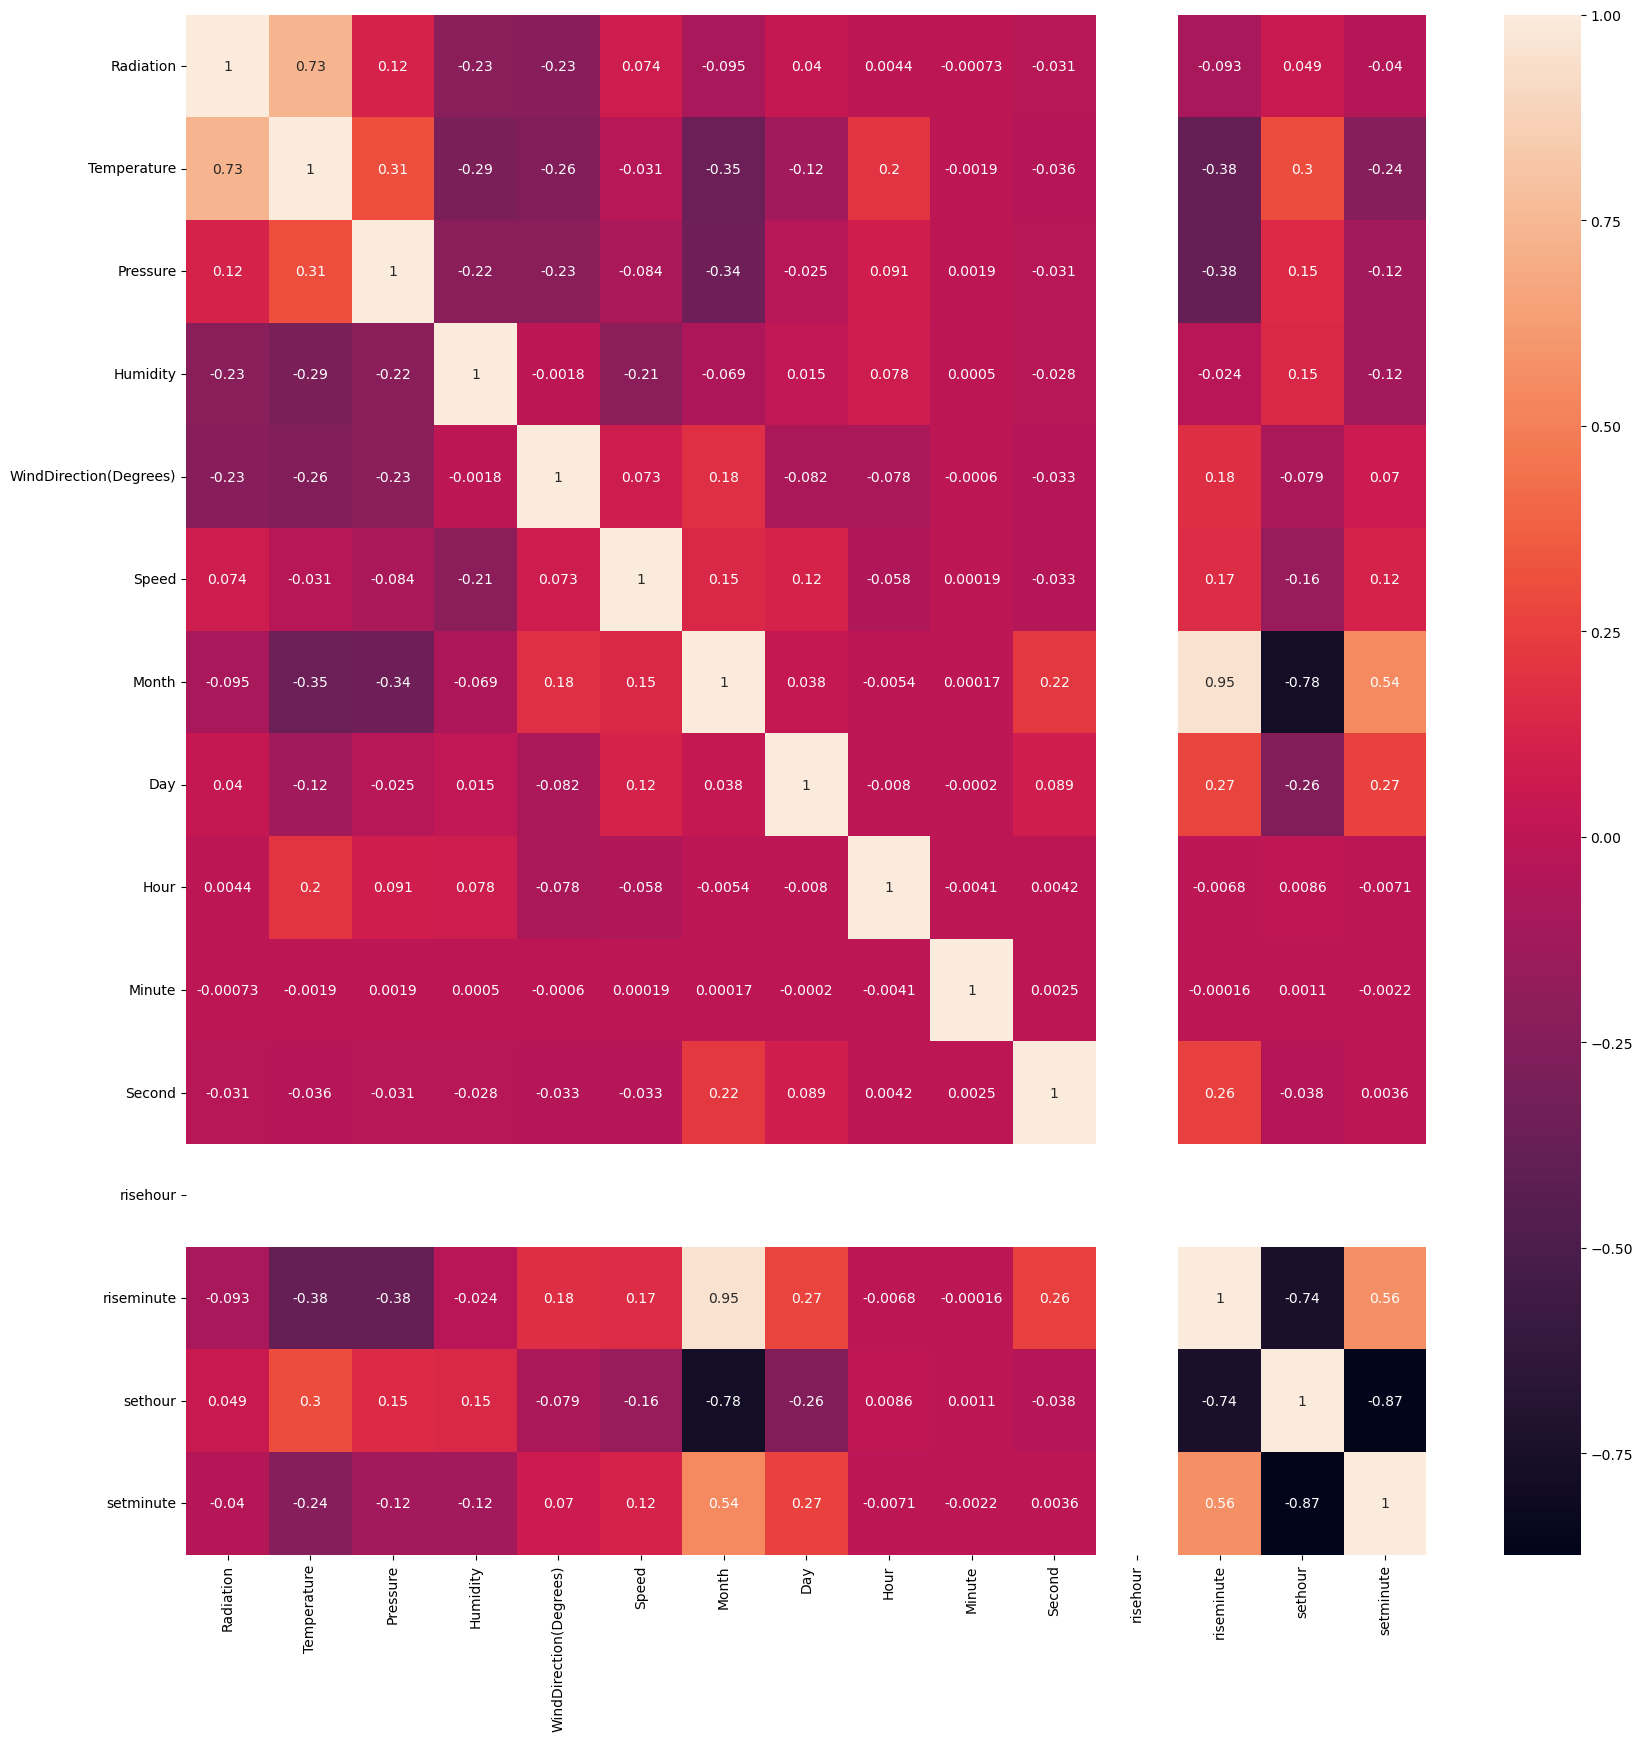

In [21]:
# heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [22]:
# Using correlation matrix we can select 
# Temperature, Pressure, Humidity, Wind-direction as important features than other for predicting Radiation

## Feature Selection using SelectKBest Method

In [23]:
# input_features and target
X = df.drop(['Radiation'], axis=1)
y = df['Radiation']

In [24]:
# SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func = chi2, k=5)

In [25]:
y



0        1.21
1        1.21
2        1.23
3        1.21
4        1.17
         ... 
32681    1.22
32682    1.17
32683    1.20
32684    1.23
32685    1.20
Name: Radiation, Length: 32686, dtype: float64

In [26]:
#target label is float value but we need labels as SelectKBest works on target label
# multiplying the data by 100 and converting it to int which can be treated as labels by the model
y_train100 =  df['Radiation'].apply(lambda x : int(x*100))

In [27]:
# applying minmax scaler before fiiting
from sklearn.preprocessing import MinMaxScaler
scaled_X = MinMaxScaler().fit_transform(X)

In [28]:
fit = bestfeatures.fit(scaled_X, y_train100)

In [29]:
# making DataFrame
scores = pd.DataFrame(fit.scores_)
column = pd.DataFrame(X.columns)

featureScores = pd.concat([column, scores], axis=1)
featureScores.columns = ['Features', 'feature_imp']

featureScores

,Features,feature_imp
0,Temperature,1651.685632
1,Pressure,523.791060
2,Humidity,1588.087433
3,WindDirection(Degrees),3271.827277
4,Speed,765.859779
5,Month,4684.579610
6,Day,2841.926850
7,Hour,691.185393
8,Minute,2702.449333
9,Second,2288.673032


In [30]:
# best features
# sorting values
featureScores.sort_values(by = 'feature_imp', ascending=False, inplace=True)
featureScores

,Features,feature_imp
12,sethour,12207.531454
5,Month,4684.579610
11,riseminute,4015.062771
3,WindDirection(Degrees),3271.827277
6,Day,2841.926850
8,Minute,2702.449333
9,Second,2288.673032
13,setminute,1863.712087
0,Temperature,1651.685632
2,Humidity,1588.087433


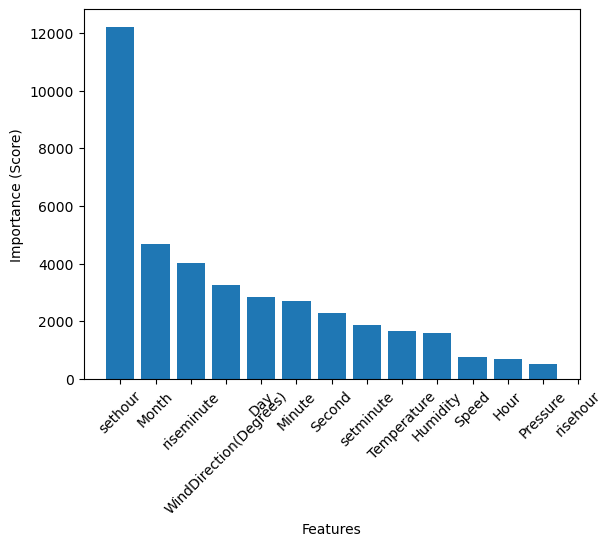

In [31]:
plt.bar(featureScores.Features, featureScores.feature_imp)
plt.xlabel("Features")
plt.ylabel("Importance (Score)")
plt.xticks(rotation=45)
plt.show()

## Feature Selection using Extra Tree Classifier

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
model_etc = ExtraTreesClassifier(n_estimators=5, verbose = 2)


In [33]:
print(y_train100)
print(scaled_X)

0        121
1        121
2        123
3        121
4        117
        ... 
32681    122
32682    117
32683    120
32684    123
32685    120
Name: Radiation, Length: 32686, dtype: int64
[[0.37837838 0.72972973 0.53684211 ... 0.12       1.         0.22033898]
 [0.37837838 0.72972973 0.52631579 ... 0.12       1.         0.22033898]
 [0.37837838 0.72972973 0.51578947 ... 0.12       1.         0.22033898]
 ...
 [0.27027027 0.62162162 0.98947368 ... 0.68       0.         0.71186441]
 [0.27027027 0.62162162 0.97894737 ... 0.68       0.         0.71186441]
 [0.27027027 0.64864865 0.97894737 ... 0.68       0.         0.71186441]]


In [34]:
model_etc.fit(scaled_X, y_train100)

building tree 1 of 5


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s


building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   41.9s finished


ExtraTreesClassifier(n_estimators=5, verbose=2)

In [35]:
# making DataFramemode
importances_etc = pd.DataFrame(model_etc.feature_importances_)
columns_etc = pd.DataFrame(X.columns)

df_etc = pd.concat([columns_etc, importances_etc], axis=1)
df_etc.columns = ['Features', 'feature_imp']


In [36]:
# sorting values
df_etc.sort_values(by = 'feature_imp', ascending=False, inplace=True)
df_etc

,Features,feature_imp
3,WindDirection(Degrees),0.159804
8,Minute,0.147816
9,Second,0.123769
4,Speed,0.122425
2,Humidity,0.107653
7,Hour,0.085955
0,Temperature,0.081995
1,Pressure,0.074763
6,Day,0.037448
13,setminute,0.026734


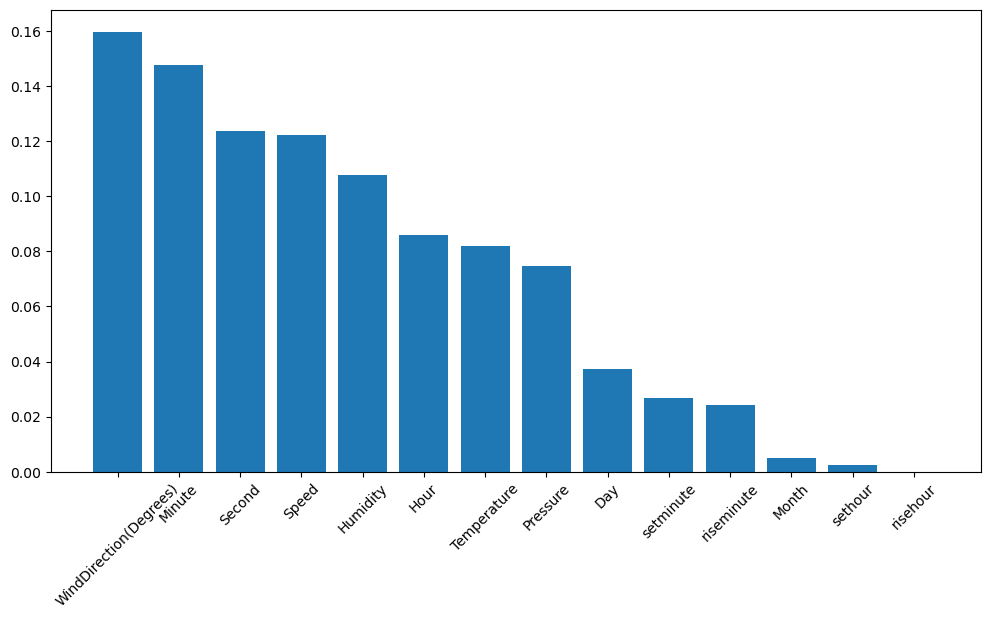

In [37]:
# plot
plt.figure(figsize=(12,6))
plt.bar(x=df_etc['Features'], height=df_etc['feature_imp'])
plt.xticks(rotation=45)
plt.show()

## Feature Engineering with BoxCox, Log, Min-Max and Standard transformation

In [38]:
# input_features and target
X = df.drop(['Radiation'], axis=1)
y = df['Radiation']

In [39]:
y.head()

0    1.21
1    1.21
2    1.23
3    1.21
4    1.17
Name: Radiation, dtype: float64

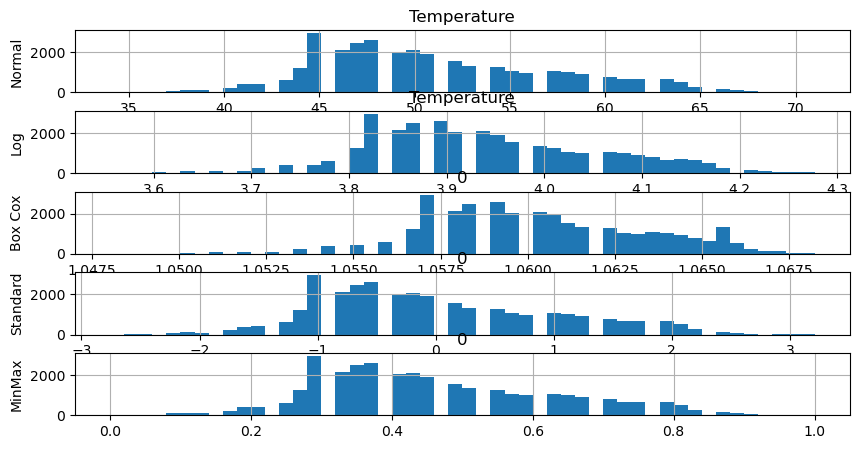

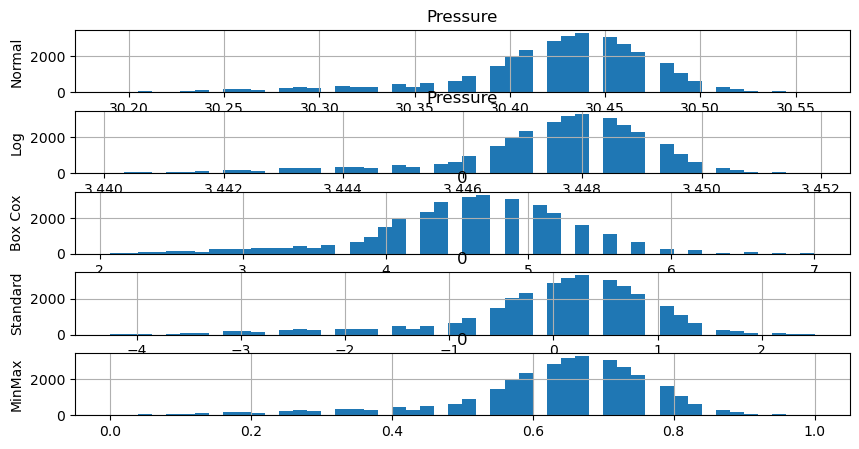

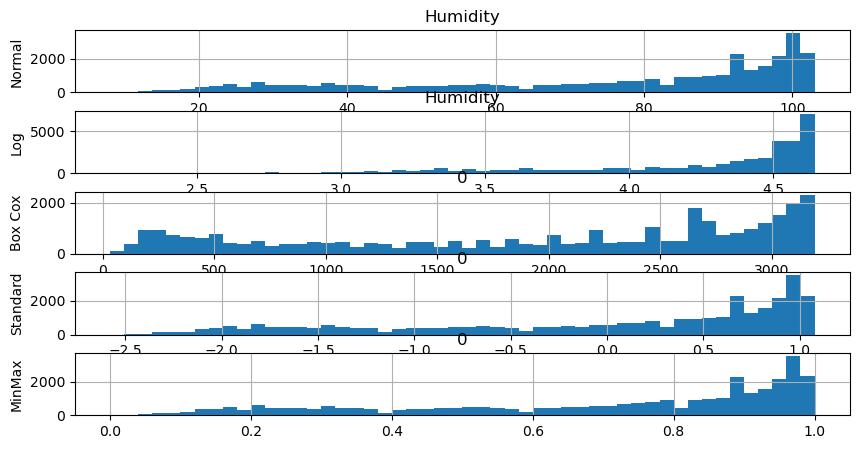

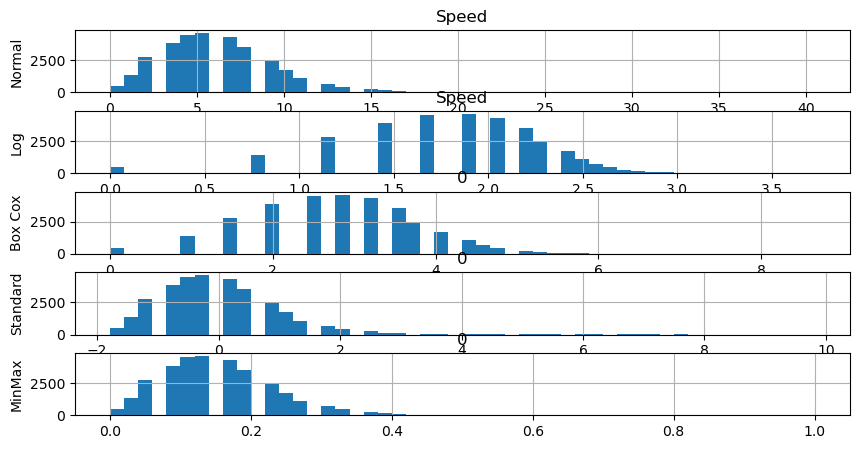

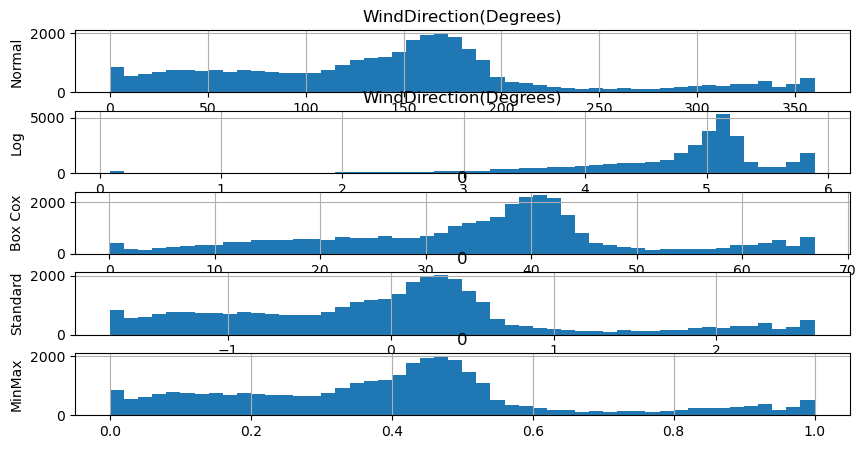

In [40]:
features_to_transform = ['Temperature', 'Pressure', 'Humidity', 'Speed', 'WindDirection(Degrees)']
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# What are we doing here?
# looking at plots of T,P,Humidity, Wind using BoxCox, Log, Min-Max & Standard transformation
# Whichever plot looks like a normal distribution curve is preferred for applying in models

for i in features_to_transform:
    # Create a figure with 5 vertical subplots
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 5))
    
    pd.DataFrame(X[i]).hist(ax = ax1, bins = 50)
    
    pd.DataFrame(np.log(X[i] + 1)).hist(ax=ax2, bins=50)
    
    # Box-Cox transformation
    # data_shifted = X[i] + 1
    pd.DataFrame(stats.boxcox(X[i]+1)[0]).hist(ax = ax3, bins = 50) 
    
    # StandardScaler transformation histogram
    scaled_data_standard = standard_scaler.fit_transform(X[[i]])
    pd.DataFrame(scaled_data_standard).hist(ax=ax4, bins=50)
    
    
    # MinMaxScaler transformation histogram
    scaled_data_minmax = min_max_scaler.fit_transform(X[[i]])
    pd.DataFrame(scaled_data_minmax).hist(ax=ax5, bins=50)
    
    ax1.set_ylabel('Normal')
    ax2.set_ylabel('Log')
    ax3.set_ylabel('Box Cox')
    ax4.set_ylabel('Standard')
    ax5.set_ylabel('MinMax')

    

In [41]:
# choosing the best plot manually by looking into plots

transform = {
    'Temperature': np.log(X['Temperature'] + 1),
    'Pressure': stats.boxcox(X['Pressure']+1)[0],
    'Humidity': stats.boxcox(X['Humidity']+1)[0],
    'Speed': np.log(X['Speed'] + 1),
    'WindDirection(Degrees)': min_max_scaler.fit_transform(X[['WindDirection(Degrees)']])
    
}

In [42]:
for i in transform:
    X[i]=transform[i]

In [43]:
X.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminute,sethour,setminute
0,3.89182,5.044903e+152,1139.358665,0.492692,1.890095,9,29,23,55,26,6,13,18,13
1,3.89182,5.044903e+152,1104.046980,0.490996,1.474763,9,29,23,50,23,6,13,18,13
2,3.89182,5.044903e+152,1069.253545,0.440894,1.474763,9,29,23,45,26,6,13,18,13
3,3.89182,5.044903e+152,1175.187489,0.382426,1.474763,9,29,23,40,21,6,13,18,13
4,3.89182,5.044903e+152,1248.392213,0.291391,1.890095,9,29,23,35,24,6,13,18,13


## Preparing data - Standardisation and Splitting

In [44]:
from sklearn.model_selection import train_test_split

# X we are using is the changed one 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# here we don't use fit for X_test as
# we use fit_transform on the training data to learn the scaling parameters (mean and standard deviation)
# For the test data, we use transform to apply the same scaling without altering the 
# learned parameters, ensuring consistency in the scaling process



In [45]:
X_train.shape, X_test.shape

((26148, 14), (6538, 14))

## XGBoost

In [46]:
from xgboost import XGBRegressor


model_xgb = XGBRegressor(learning_rate=0.1,
    max_depth=8,
    n_estimators=100,
    random_state=42)


In [47]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [48]:
y_prediction = model_xgb.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test, y_prediction))
r2 = r2_score(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))
print("MAE: {:.2f}".format(mae))


Testing performance
RMSE: 82.83
R2: 0.93
MAE: 33.55


## Using MultiLayer Perceptron for prediction

In [50]:
import keras
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Sequential

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
X.shape

(32686, 14)

In [53]:
model = None
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=14)) #input_dim = n_columns
model.add(Dropout(0.33))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(1, activation='linear'))

# compiling all
model.compile(metrics= ['mse'], loss='mae', optimizer= Adam(learning_rate=0.001))
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [54]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=32)

Epoch 1/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - loss: 161.0690 - mse: 94105.8984 - val_loss: 82.0208 - val_mse: 24853.6621
Epoch 2/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 86.1281 - mse: 27863.8262 - val_loss: 73.1196 - val_mse: 19774.0645
Epoch 3/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 79.1134 - mse: 24322.5137 - val_loss: 71.0523 - val_mse: 18974.7500
Epoch 4/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 77.3763 - mse: 23171.6211 - val_loss: 65.5523 - val_mse: 16574.0137
Epoch 5/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 73.8383 - mse: 21370.0078 - val_loss: 62.9690 - val_mse: 15646.5684
Epoch 6/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 71.8016 - mse: 20145.6094 - val_loss: 63.0807 - val_mse: 15545.8857
Epoch 7/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 70.8308 - mse: 20018.3711 - val_loss: 58.1406 - val_mse: 13896.2568
Epoch 8/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 69.4510 - mse: 19565.6914 -

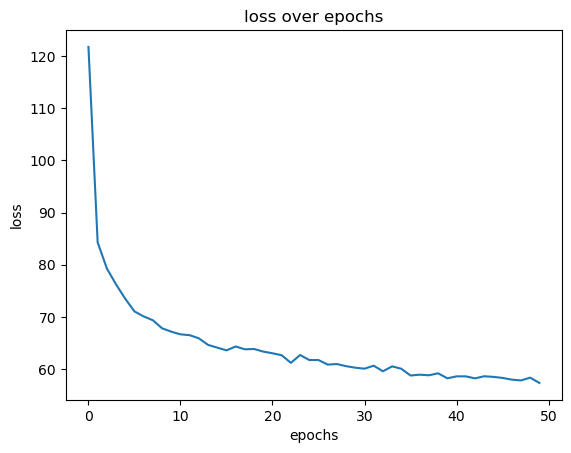

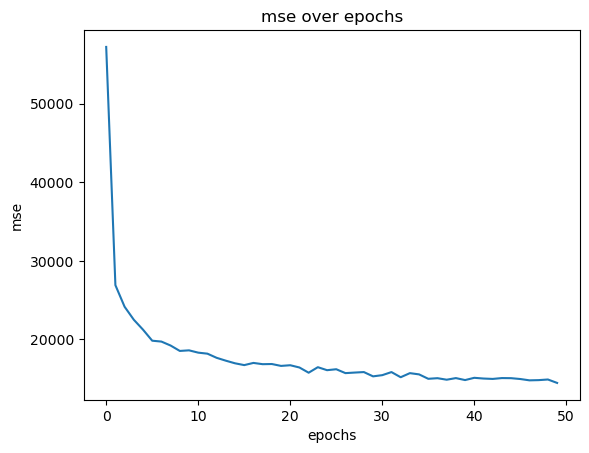

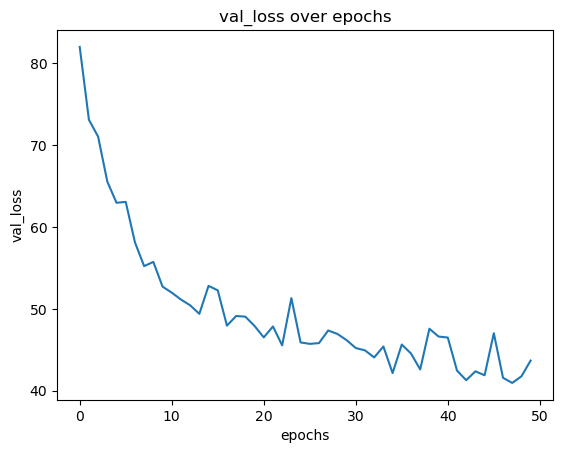

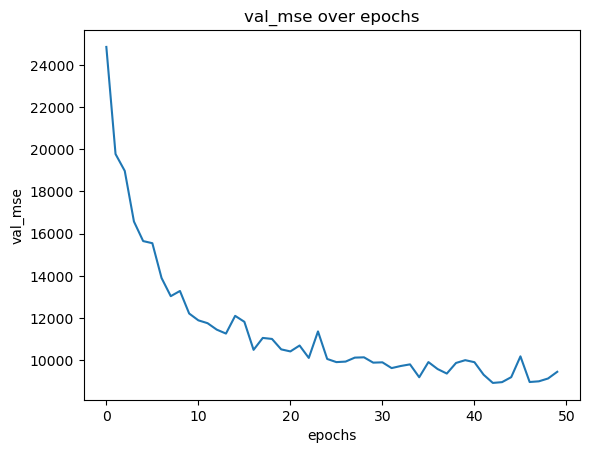

In [55]:
fit = history.history
for i in fit:
    plt.plot(fit[i])
    plt.title(i + ' over epochs')
    plt.ylabel(i)
    plt.xlabel('epochs')
    plt.show()

In [56]:
y_prediction_mlp =model.predict(X_test)

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step


In [57]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rmse_mlp = np.sqrt(mean_squared_error(y_test, y_prediction_mlp))
r2_mlp = r2_score(y_test, y_prediction_mlp)
mae_mlp = mean_absolute_error(y_test, y_prediction_mlp)


print("Testing performance")

print("RMSE: {:.2f}".format(rmse_mlp))
print("R2: {:.2f}".format(r2_mlp))
print("MAE: {:.2f}".format(mae_mlp))


Testing performance
RMSE: 100.58
R2: 0.90
MAE: 43.89


End ..